In [1]:
import pandas as pd

df = pd.read_csv('./aqi_datasets/city_hour.csv')

print(df.shape)
print(df.head())
print(df.info())

(438245, 17)
   Unnamed: 0       City             Datetime  PM2.5   PM10     NO   NO2  \
0           0      Delhi  2015-01-01 00:00:00  258.0  340.6  191.0  13.4   
1           1     Mumbai  2015-01-01 00:00:00  120.1   47.9  165.3  57.9   
2           2    Chennai  2015-01-01 00:00:00  130.1  375.0   21.9  23.7   
3           3    Kolkata  2015-01-01 00:00:00  189.1  174.3  139.7  58.9   
4           4  Bangalore  2015-01-01 00:00:00  357.8   48.8  121.2  83.3   

     NOx   NH3    CO   SO2     O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  104.1  16.2  1.15  39.8   70.4    11.64    10.23    1.95  411.5   Moderate  
1  139.2  14.4  0.76   3.3   23.2    11.35    11.38    1.53  134.8       Poor  
2  205.6  33.6  3.50  63.0  138.9    16.30    24.07    0.56  329.6       Poor  
3  103.7  19.2  0.81   3.3   14.6     5.12     1.42    2.35  351.9       Good  
4    8.3  11.9  6.31  67.4  195.9    15.12    16.80    8.95   23.7   Moderate  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

In [2]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [4]:
df.isnull().sum()

Unnamed: 0    0
City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [6]:
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute
df['Second'] = df['Datetime'].dt.second
df['DayofWeek'] = df['Datetime'].dt.dayofweek
df['DayofYear'] = df['Datetime'].dt.dayofyear
df['WeekofYear'] = df['Datetime'].dt.isocalendar().week
df['Quarter'] = df['Datetime'].dt.quarter
df['DayofMonth'] = df['Datetime'].dt.day
df['Weekday'] = df['Datetime'].dt.weekday
df['WeekdayName'] = df['Datetime'].dt.strftime('%A')
df['MonthName'] = df['Datetime'].dt.strftime('%B')
df['DayName'] = df['Datetime'].dt.strftime('%a')


In [7]:
df.head()

,Unnamed: 0,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,...,Second,DayofWeek,DayofYear,WeekofYear,Quarter,DayofMonth,Weekday,WeekdayName,MonthName,DayName
0,0,Delhi,2015-01-01,258.0,340.6,191.0,13.4,104.1,16.2,1.15,...,0,3,1,1,1,1,3,Thursday,January,Thu
1,1,Mumbai,2015-01-01,120.1,47.9,165.3,57.9,139.2,14.4,0.76,...,0,3,1,1,1,1,3,Thursday,January,Thu
2,2,Chennai,2015-01-01,130.1,375.0,21.9,23.7,205.6,33.6,3.50,...,0,3,1,1,1,1,3,Thursday,January,Thu
3,3,Kolkata,2015-01-01,189.1,174.3,139.7,58.9,103.7,19.2,0.81,...,0,3,1,1,1,1,3,Thursday,January,Thu
4,4,Bangalore,2015-01-01,357.8,48.8,121.2,83.3,8.3,11.9,6.31,...,0,3,1,1,1,1,3,Thursday,January,Thu


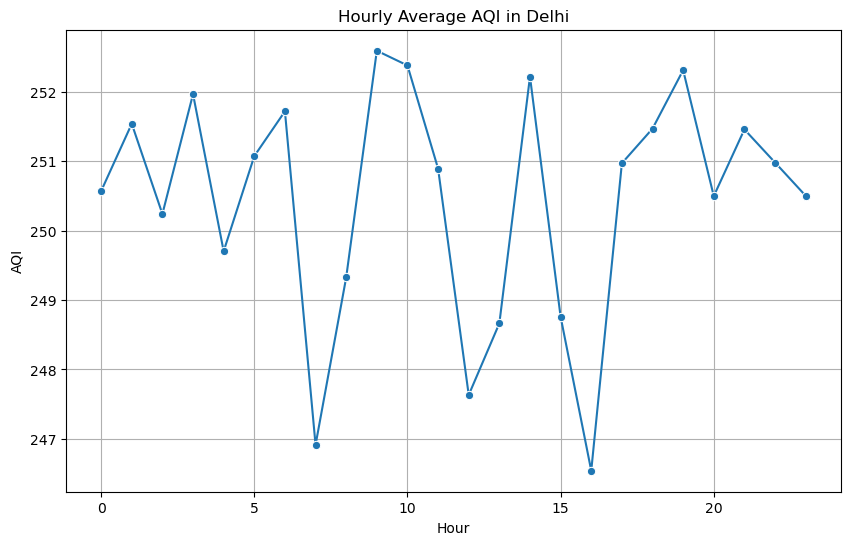

In [9]:
delhi_hour = df[df['City'] == 'Delhi']
hourly_avg = delhi_hour.groupby('Hour')['AQI'].mean()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
plt.grid(True)
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
plt.title('Hourly Average AQI in Delhi')
plt.xlabel('Hour')
plt.ylabel('AQI')
plt.show()

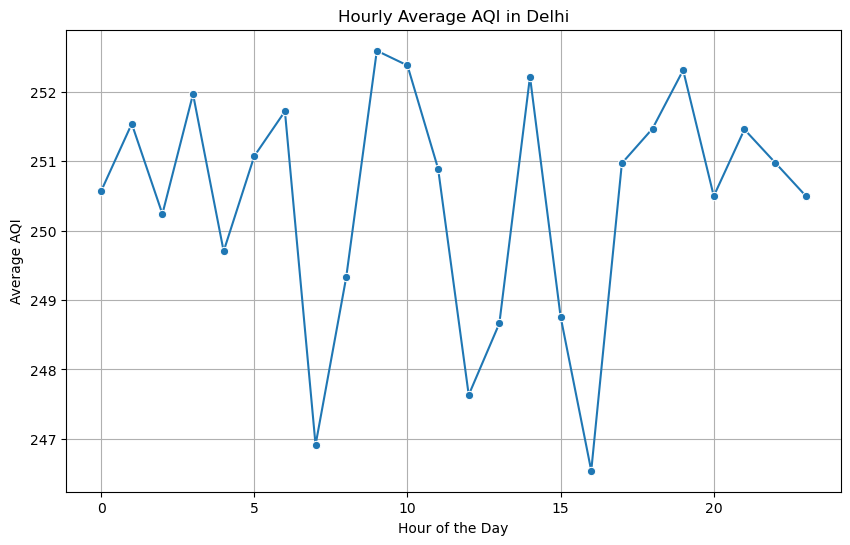

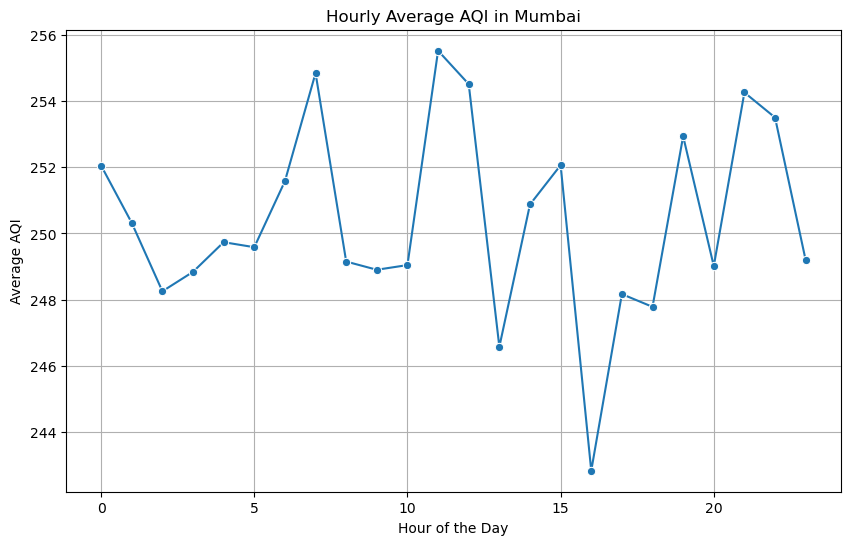

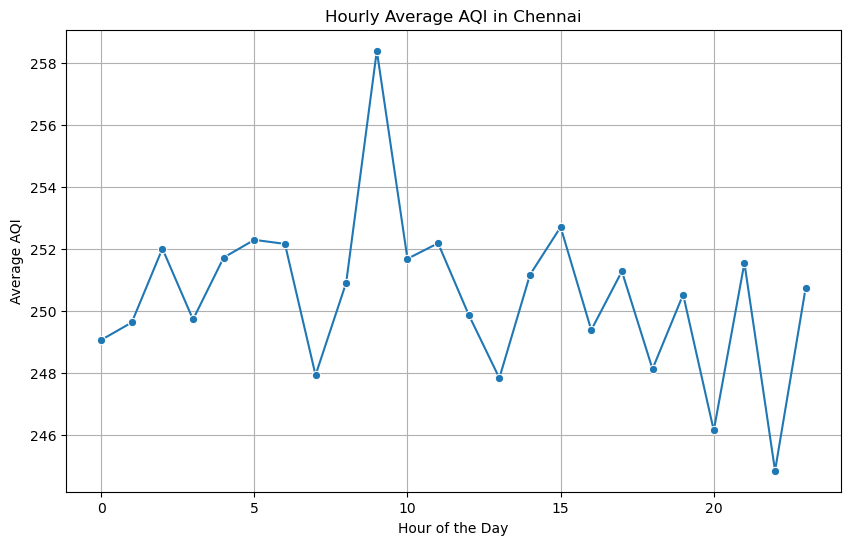

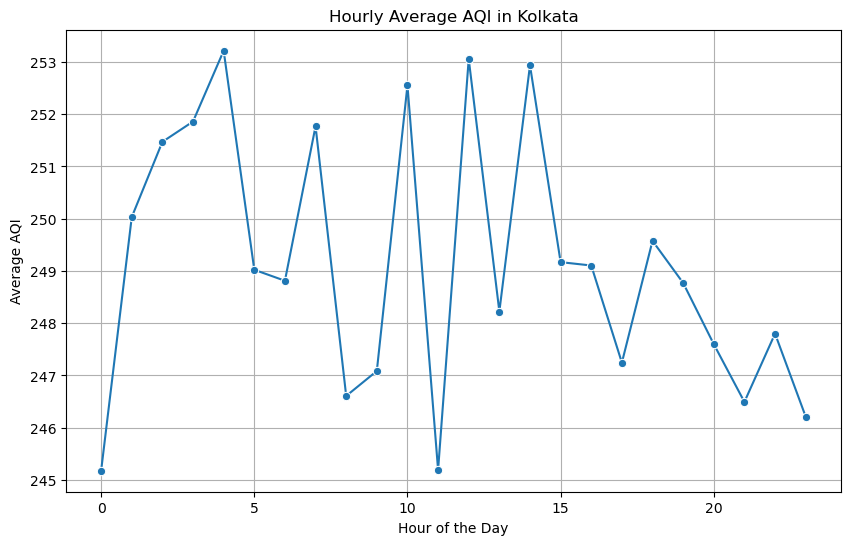

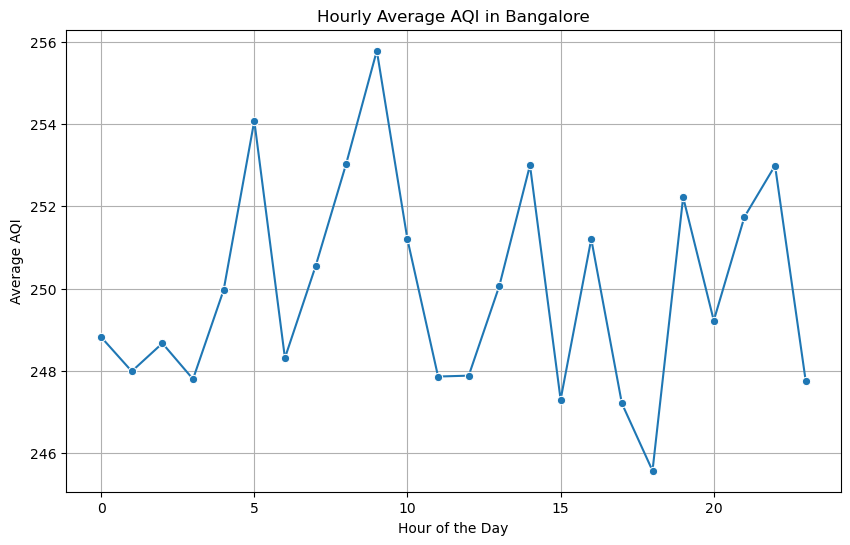

In [11]:
cities = df['City'].unique()

for city in cities:
    city_df = df[df['City'] == city]
    hourly_avg = city_df.groupby('Hour')['AQI'].mean()

    plt.figure(figsize=(10,6))
    plt.grid(True)
    sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
    plt.title(f'Hourly Average AQI in {city}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average AQI')
    plt.show()
    

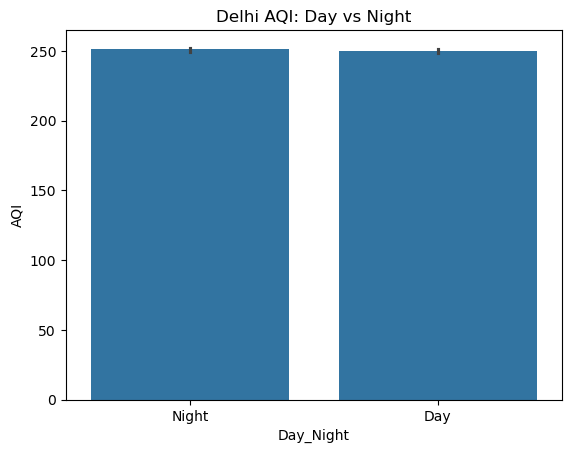

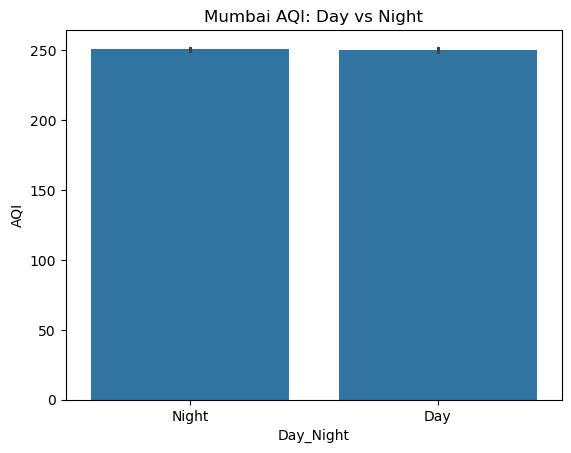

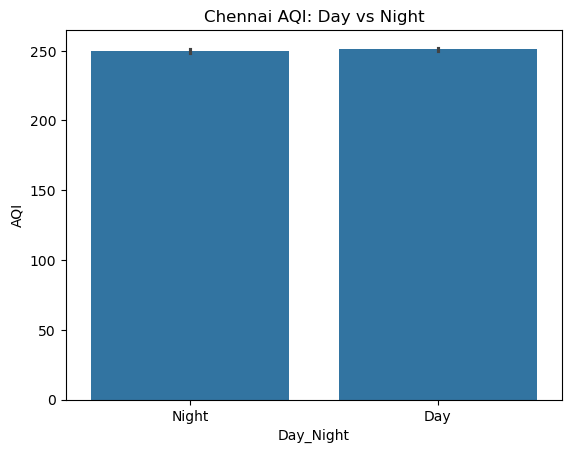

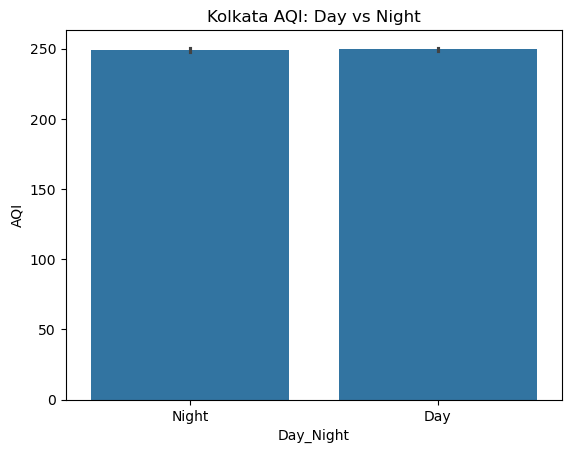

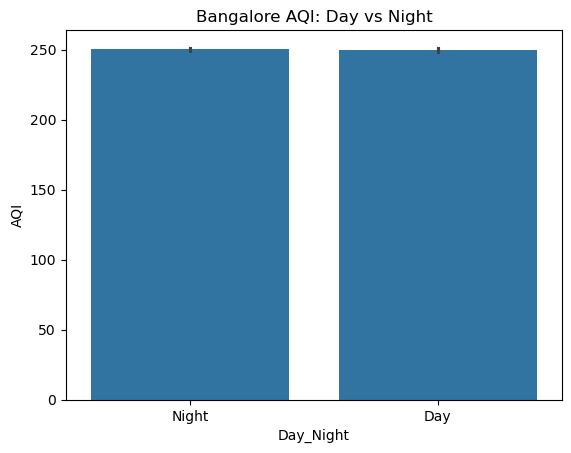

In [13]:
df['Day_Night'] = df['Hour'].apply(lambda x:'Day' if 6 <= x <= 18 else 'Night')
for city in cities:
    city_df = df[df['City'] == city]
    sns.barplot(x='Day_Night', y='AQI',data=city_df)
    plt.title(f'{city} AQI: Day vs Night')
    plt.show()


In [14]:
df.head()

,Unnamed: 0,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,...,DayofWeek,DayofYear,WeekofYear,Quarter,DayofMonth,Weekday,WeekdayName,MonthName,DayName,Day_Night
0,0,Delhi,2015-01-01,258.0,340.6,191.0,13.4,104.1,16.2,1.15,...,3,1,1,1,1,3,Thursday,January,Thu,Night
1,1,Mumbai,2015-01-01,120.1,47.9,165.3,57.9,139.2,14.4,0.76,...,3,1,1,1,1,3,Thursday,January,Thu,Night
2,2,Chennai,2015-01-01,130.1,375.0,21.9,23.7,205.6,33.6,3.50,...,3,1,1,1,1,3,Thursday,January,Thu,Night
3,3,Kolkata,2015-01-01,189.1,174.3,139.7,58.9,103.7,19.2,0.81,...,3,1,1,1,1,3,Thursday,January,Thu,Night
4,4,Bangalore,2015-01-01,357.8,48.8,121.2,83.3,8.3,11.9,6.31,...,3,1,1,1,1,3,Thursday,January,Thu,Night


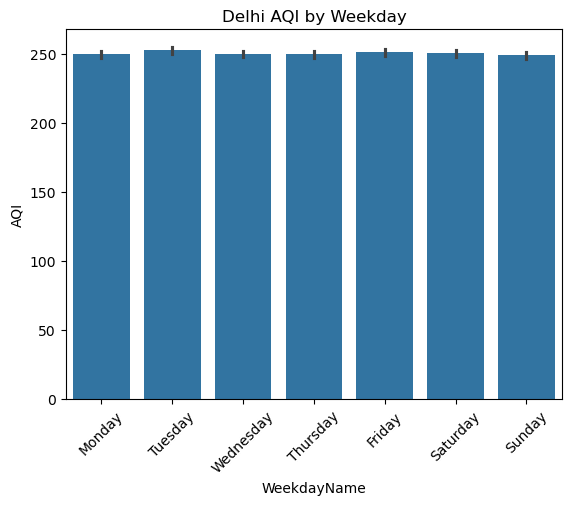

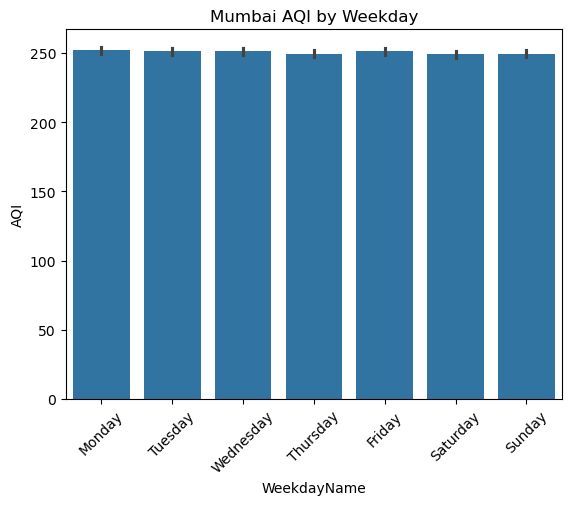

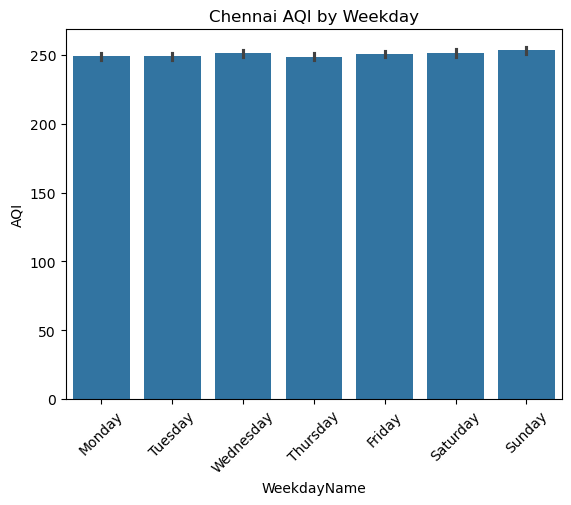

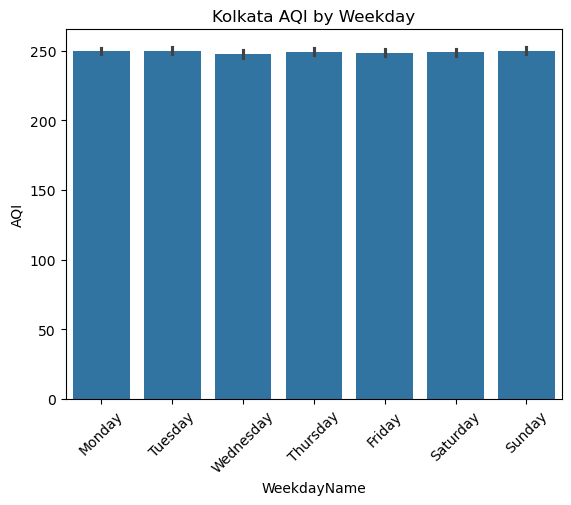

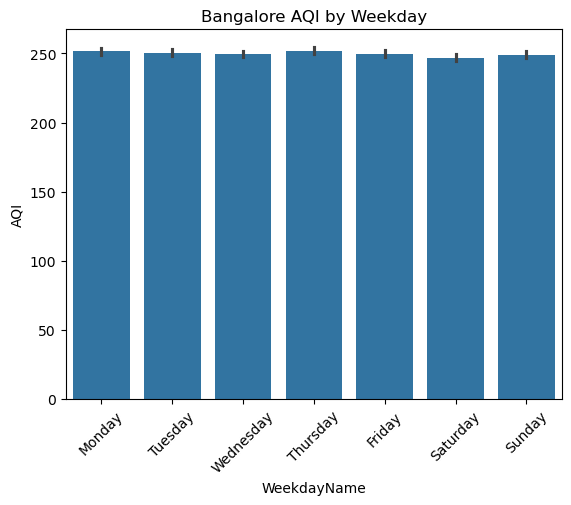

In [15]:
for city in cities:
    city_df = df[df['City'] == city]
    sns.barplot(x='WeekdayName',y='AQI', data=city_df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    plt.xticks(rotation=45)
    plt.title(f'{city} AQI by Weekday')
    plt.show()

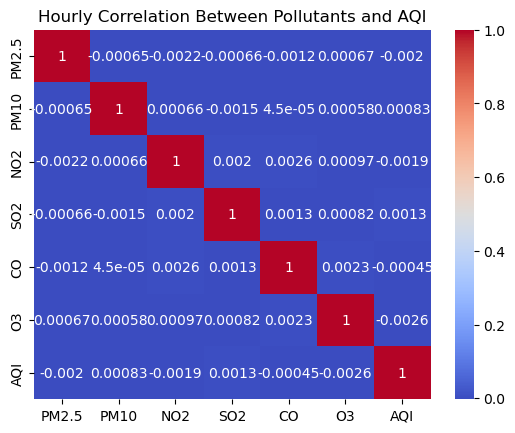

In [16]:
corr = df[['PM2.5','PM10','NO2','SO2','CO','O3','AQI']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Hourly Correlation Between Pollutants and AQI')
plt.show()

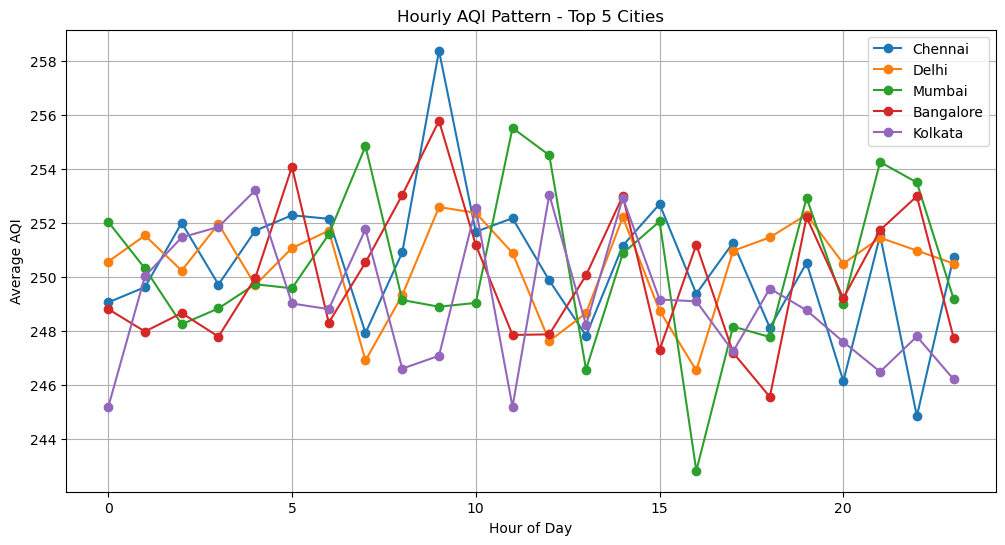

In [20]:
top_cities = df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(5).index

plt.figure(figsize=(12,6))
for city in top_cities:
    hourly_pattern = df[df['City'] == city].groupby('Hour')['AQI'].mean()
    plt.grid(True)
    plt.plot(hourly_pattern.index, hourly_pattern.values, label=city, marker='o')

plt.title('Hourly AQI Pattern - Top 5 Cities')
plt.xlabel('Hour of Day')
plt.ylabel('Average AQI')
plt.legend()
plt.show()


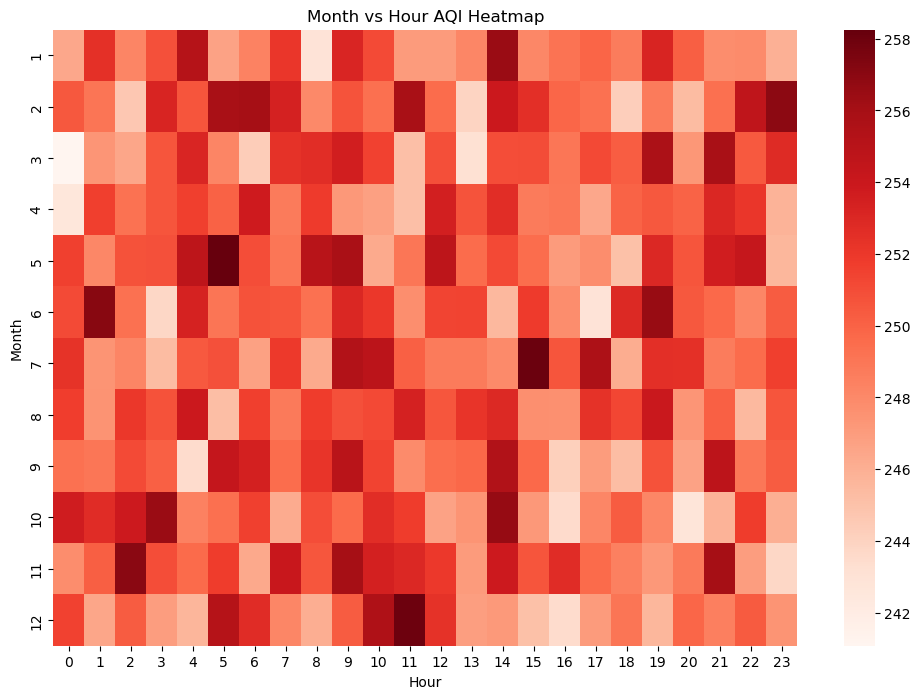

In [21]:
hour_month = df.groupby(['Month','Hour'])['AQI'].mean().unstack()
plt.figure(figsize=(12,8))
sns.heatmap(hour_month, cmap='Reds')
plt.title('Month vs Hour AQI Heatmap')
plt.show()